In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for ‘Adelie’ and ‘Chinstrap’ classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()  # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded']  # Target variable
X = df_filtered.drop(['class_encoded'], axis=1)


       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [4]:
print(X.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg=LogisticRegression(solver='saga')
logreg.fit(X_train,y_train) 
y_pred=logreg.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(logreg.coef_,logreg.intercept_)

ValueError: could not convert string to float: 'Adelie'

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
num_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
cat_cols = ['island','sex']
X = df_filtered[num_cols + cat_cols]

pre=ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

clf=Pipeline([
    ('pre', pre),
    ('logreg', LogisticRegression(solver='saga'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(clf.named_steps['logreg'].coef_,clf.named_steps['logreg'].intercept_)

Accuracy: 0.58
[[ 2.75426929e-03 -8.41329162e-05  4.55210626e-04 -2.86128077e-04
  -8.86361889e-05  1.84437531e-04 -1.04293827e-04 -1.78814448e-05
   9.38896044e-06]] [-8.4925212e-06]


e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [29]:
clf=Pipeline([
    ('pre', pre),
    ('logreg', LogisticRegression(solver='liblinear'))
])


clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(clf.named_steps['logreg'].coef_,clf.named_steps['logreg'].intercept_)

Accuracy: 1.00
[[ 1.47468853 -1.37430792 -0.14078737 -0.00345252 -0.22719322  0.70932875
  -0.55842987  0.12816578 -0.20446011]] [-0.07629434]


In [34]:
import numpy as np
random_state=np.arange(0,100)
accuracies=[]

clf=Pipeline([
    ('pre', pre),
    ('logreg', LogisticRegression(solver='saga'))
])

for rs in random_state:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracies.append(accuracy)

e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: Convergen

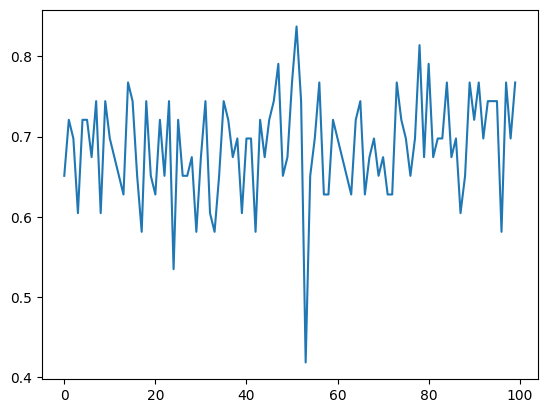

In [35]:
import matplotlib.pyplot as plt
plt.plot(random_state, accuracies)


In [37]:
def output_(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(clf.named_steps['logreg'].coef_,clf.named_steps['logreg'].intercept_)

In [38]:
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()

pre=ColumnTransformer([
    ('num', sta, num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

clf_saga=Pipeline([
    ('pre', pre),
    ('logreg', LogisticRegression(solver='saga'))
])

clf_lin=Pipeline([
    ('pre', pre),
    ('logreg', LogisticRegression(solver='liblinear'))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
output_(clf_saga, X_train, X_test, y_train, y_test)
output_(clf_lin, X_train, X_test, y_train, y_test)


Accuracy: 1.00
[[ 3.40883523 -0.51192123  0.37518624 -0.41863158 -0.48973713  1.2372622
  -0.78550717  0.73686065 -0.77484275]] [-2.58556953]
Accuracy: 1.00
[[ 3.3644409  -0.46791442  0.34694072 -0.41617085 -0.76546108  0.64453562
  -1.11853078  0.10655085 -1.34600708]] [-1.23945623]


e:\SEM5\EN3150-Pattern\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
